<font color=blue> <h1> Building Used Car Price Prediction Model </h1> </font>

## About the Project:
### The title of the project is “Resale Valuation of Used Cars in India”. In this project I will build a model that can predict the resale valuation (Price) of the used cars such that it will become convenient for the customer to choose the best deal among the wide range of options available in the market and I will hereby deploy the model into a Web Application which will be itself build by myself.
### In this project I will used data from CarDekho website, build a price prediction model and deploy it in a web app.

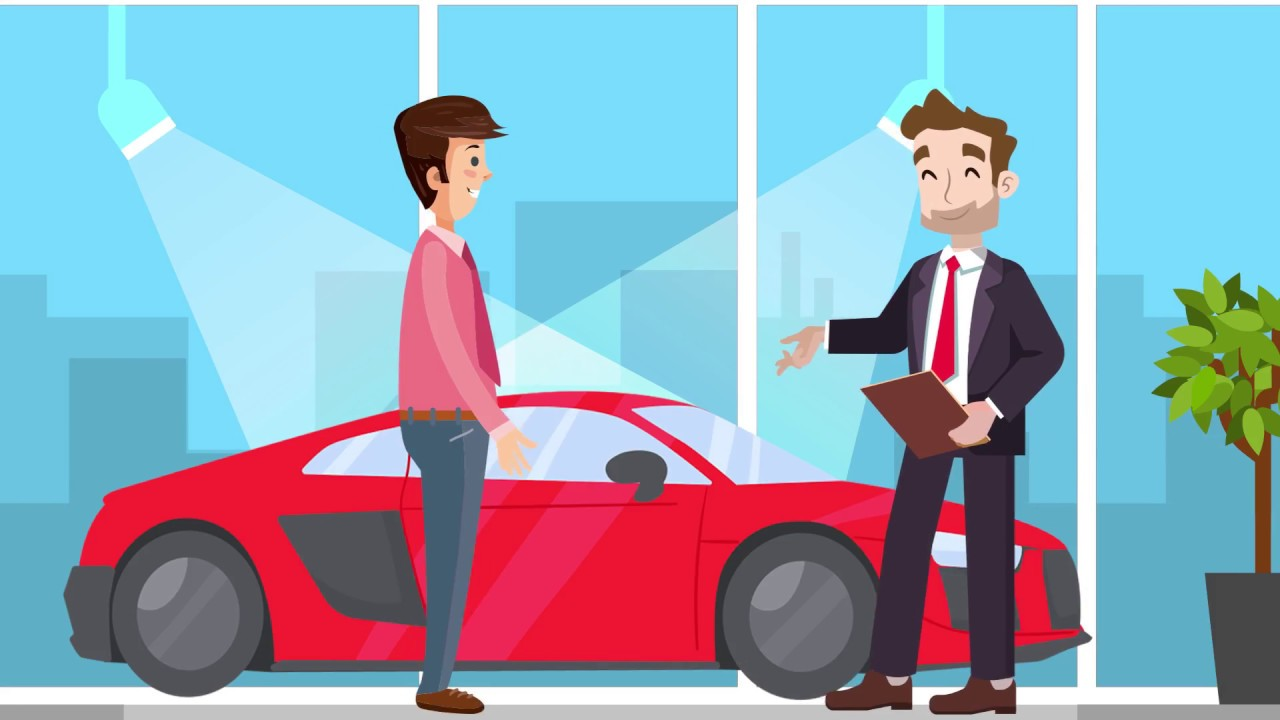

<font color=blue> <h1> Importing the Essential Libraries </h1> </font>

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

<font color=blue> <h1> Importing the Dataset and Visualizing it </h1> </font>

In [2]:
cars=pd.read_csv("C:\\Users\\SHAIKH MARIYA\\Documents\\cars dekho updated.csv")
cars.head()

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.2 Lakh*,NaN,2012,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,Hyundai Grand i10 Asta,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,2.15 Lakh*,NaN,2010,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,Maruti Alto K10 2010-2014 VXI,2.26 Lakh*,NaN,2012,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5


In [3]:
print("The number of rows is:", cars.shape[0])
print("The number of columns is:", cars.shape[1])

The number of rows is: 19974
The number of columns is: 13


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19974 entries, 0 to 19973
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   full_name          19974 non-null  object
 1   selling_price      19974 non-null  object
 2   new_price          9564 non-null   object
 3   year               19974 non-null  int64 
 4   seller_type        19974 non-null  object
 5   km_driven          19974 non-null  object
 6   owner_type         19974 non-null  object
 7   fuel_type          19974 non-null  object
 8   transmission_type  19974 non-null  object
 9   mileage            19814 non-null  object
 10  engine             19864 non-null  object
 11  max_power          19637 non-null  object
 12  seats              19887 non-null  object
dtypes: int64(1), object(12)
memory usage: 2.0+ MB


### Checking null values

In [5]:
def null_count():
    return pd.DataFrame({'Data Type': cars.dtypes,
                        'Null Count': cars.isnull().sum(),
                        'Percentage of Null': (cars.isnull().sum()/ cars.shape[0])*100}).style.background_gradient(cmap='Blues',low=0.1,high=0.01)
null_count()

,Data Type,Null Count,Percentage of Null
full_name,object,0,0.000000
selling_price,object,0,0.000000
new_price,object,10410,52.117753
year,int64,0,0.000000
seller_type,object,0,0.000000
km_driven,object,0,0.000000
owner_type,object,0,0.000000
fuel_type,object,0,0.000000
transmission_type,object,0,0.000000
mileage,object,160,0.801041


### Distribution of each values

In [6]:
print("The Distribution of Seller Type:")
print(cars.seller_type.value_counts())
print()

print("The Distribution of Fuel Type:")
print(cars.fuel_type.value_counts())
print()

print("The Distribution of Transmission Type:")
print(cars.transmission_type.value_counts())
print()

print("The Distribution of Seats in the Car:")
print(cars.seats.value_counts())

cars.shape

The Distribution of Seller Type:
Dealer              11970
Individual           7814
Trustmark Dealer      190
Name: seller_type, dtype: int64

The Distribution of Fuel Type:
Diesel      9815
Petrol      9763
CNG          316
LPG           66
Electric      14
Name: fuel_type, dtype: int64

The Distribution of Transmission Type:
Manual       16025
Automatic     3949
Name: transmission_type, dtype: int64

The Distribution of Seats in the Car:
Seats5     16585
Seats7      2370
Seats8       443
Seats4       225
Seats6       143
Seats9        72
Seats10       26
Seats2        21
Seats14        2
Name: seats, dtype: int64


(19974, 13)

<font color=blue> <h1> Cleaning the Dataset </h1> </font>

### Cleaning selling price column
Selling price has different values such as "5.5 Lakh*", "2.3 Cr*" and "95,000*" which is of data type object, gettting only the numerical value and multipling by suffix value lakhs, cr... eg(5.5 Lakh*: 500000, 2.3Cr*: 23000000, 95,000*: 95000)

In [7]:
for i in range(cars.shape[0]):
    try:
        price = float(cars['selling_price'][i].split(' ')[0])
        digit = cars['selling_price'][i].split(' ')[1]
        if digit == 'Lakh*':
            price = price * 100000
            cars['selling_price'][i] = price
        elif digit == 'Cr*':
            price = price * 10000000
            cars['selling_price'][i] = price
    except:
        price = cars['selling_price'][i][:-1]
        price = price.replace(',', '')
        cars['selling_price'][i] = float(price)

In [8]:
cars.head()

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,120000.0,NaN,2012,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,Hyundai Grand i10 Asta,550000.0,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,215000.0,NaN,2010,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,Maruti Alto K10 2010-2014 VXI,226000.0,NaN,2012,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,570000.0,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5


### Cleaning kilometer driven, Mileage, Engine, Maxpower and Seats columns
km_driven, mileage, engine, max_power and seats have values like "120,000 kms", "Mileage19.7 kmpl", "Engine796CC", "Max Power46.3 bhp" and "seats5", getting only the numerical values from those strings. eg (km_driven: 120000, mileage: 19.7, engine:796, max_power: 46.3, seats: 5)

In [9]:
# Kilometer driven
cars['km_driven']= cars['km_driven'].str.split(' ', expand=True)[0]
cars['km_driven']= cars['km_driven'].str.replace(',', '')

# Mileage
cars['mileage'] = cars['mileage'].str.split(' ', expand=True)[0].str.split('e', expand=True)[2]

# Engine
cars['engine'] = cars['engine'].str.split(' ', expand=True)[0].str.split('e',expand=True)[1]

# Max Power
cars['max_power'] = cars['max_power'].str.split(' ', expand=True)[1].str.split('r',expand=True)[1]

# Seats 
cars['seats'] = cars['seats'].str.split('s', expand=True)[1]

cars.head(3)

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,120000.0,NaN,2012,Individual,120000,First Owner,Petrol,Manual,19.7,796,46.3,5
1,Hyundai Grand i10 Asta,550000.0,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,20000,First Owner,Petrol,Manual,18.9,1197,82,5
2,Hyundai i20 Asta,215000.0,NaN,2010,Individual,60000,First Owner,Petrol,Manual,17.0,1197,80,5


### Changing the Data types of the columns
Changing the data types of the feaures such as selling_price, km_driven, mileage, engine, max_power, seats to int/float

In [10]:
cols=['selling_price', 'km_driven', 'mileage', 'engine','max_power', 'seats']

for i in cols: 
    try:
        cars[i]=cars[i].astype(int)
    except:
        cars[i]=cars[i].astype(float)

cars.dtypes

full_name             object
selling_price          int32
new_price             object
year                   int64
seller_type           object
km_driven              int32
owner_type            object
fuel_type             object
transmission_type     object
mileage              float64
engine               float64
max_power            float64
seats                float64
dtype: object

### Creating new feature Company
Creating a new feature "company" from full_name by getting the first word which is actually the cars company name, "Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV" this car model belongs to Ford company

In [11]:
cars['Company']=cars['full_name'].str.split(' ', expand=True)[0]
cars.head()

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats,Company
0,Maruti Alto Std,120000,NaN,2012,Individual,120000,First Owner,Petrol,Manual,19.70,796.0,46.30,5.0,Maruti
1,Hyundai Grand i10 Asta,550000,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,20000,First Owner,Petrol,Manual,18.90,1197.0,82.00,5.0,Hyundai
2,Hyundai i20 Asta,215000,NaN,2010,Individual,60000,First Owner,Petrol,Manual,17.00,1197.0,80.00,5.0,Hyundai
3,Maruti Alto K10 2010-2014 VXI,225999,NaN,2012,Individual,37000,First Owner,Petrol,Manual,20.92,998.0,67.10,5.0,Maruti
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,570000,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,30000,First Owner,Diesel,Manual,22.77,1498.0,98.59,5.0,Ford


### Droping unwanted columns
Droping "new_price" column which has more the 50 percent missing values, "full_name" because I created company column for better analysis and "owner_type" for having only one value which doesn't provide any information.

In [12]:
cars.drop(columns=['full_name','new_price','owner_type'], inplace=True)
cars.head(3)

,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,Company
0,120000,2012,Individual,120000,Petrol,Manual,19.7,796.0,46.3,5.0,Maruti
1,550000,2016,Individual,20000,Petrol,Manual,18.9,1197.0,82.0,5.0,Hyundai
2,215000,2010,Individual,60000,Petrol,Manual,17.0,1197.0,80.0,5.0,Hyundai


<font color=blue> <h1> Exploratory Data Analysis </h1> </font>

In this section, we will explore data and find patterns, which may be useful for feature engineering later. Since the goal of the project is to build the car price prediction model, the main purpose of this chapter is to find relations between features and the target column (selling_price).

### Basic statistic on numerical features

In [13]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
selling_price,19974.0,739294.432612,910400.116520,25000.0,340000.00,520000.0,785000.00,39500000.0
year,19974.0,2014.526134,3.248791,1991.0,2013.00,2015.0,2017.00,2021.0
km_driven,19974.0,58238.894663,51727.595500,100.0,31114.00,52000.0,74000.00,3800000.0
mileage,19814.0,19.503637,4.298090,4.0,16.95,19.3,22.32,120.0
engine,19864.0,1477.805981,519.843056,72.0,1197.00,1248.0,1582.00,6752.0
max_power,19637.0,99.448762,43.784904,25.4,73.94,86.8,114.00,626.0
seats,19887.0,5.319807,0.837676,2.0,5.00,5.0,5.00,14.0


### Basic statistics on categorical features

In [14]:
cars.describe(include='O').T

,count,unique,top,freq
seller_type,19974,3,Dealer,11970
fuel_type,19974,5,Diesel,9815
transmission_type,19974,2,Manual,16025
Company,19974,42,Maruti,5648


### Number of Unique values in each features

Let's start by plotting the barplot of Number of Unique values in each features

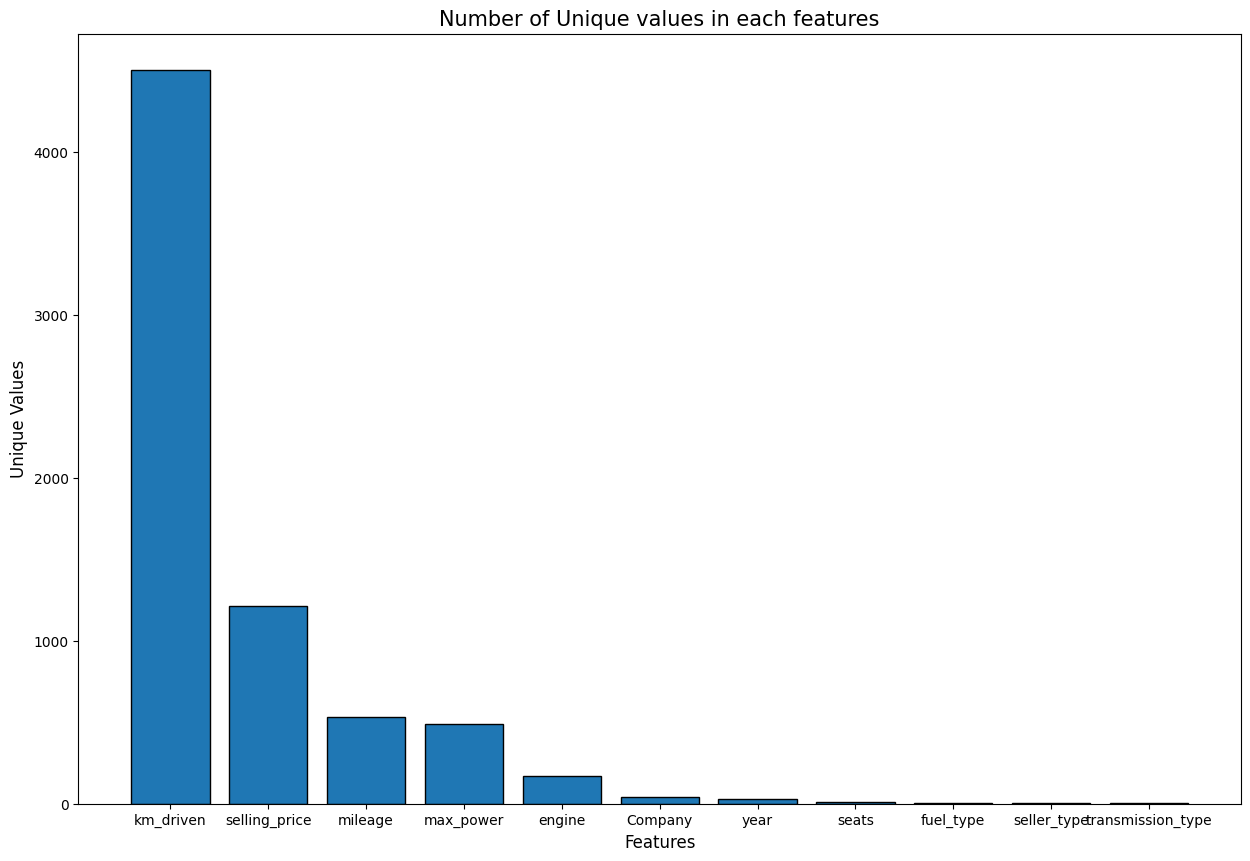

In [15]:
x= cars.nunique().sort_values(ascending=False).index
y = cars.nunique().sort_values(ascending=False).values
fig, barplot = plt.subplots(figsize = (15,10))
barplot = plt.bar(x, y, ec="black")
plt.title("Number of Unique values in each features", size=15)
plt.xlabel("Features", size=12)
plt.ylabel("Unique Values", size=12)
plt.show()

From this chart we can demonstrate the number of unique values in each features. Here, from the graph we can conclude that the km_driven has the most unique values.

### Year and Transmission Feature

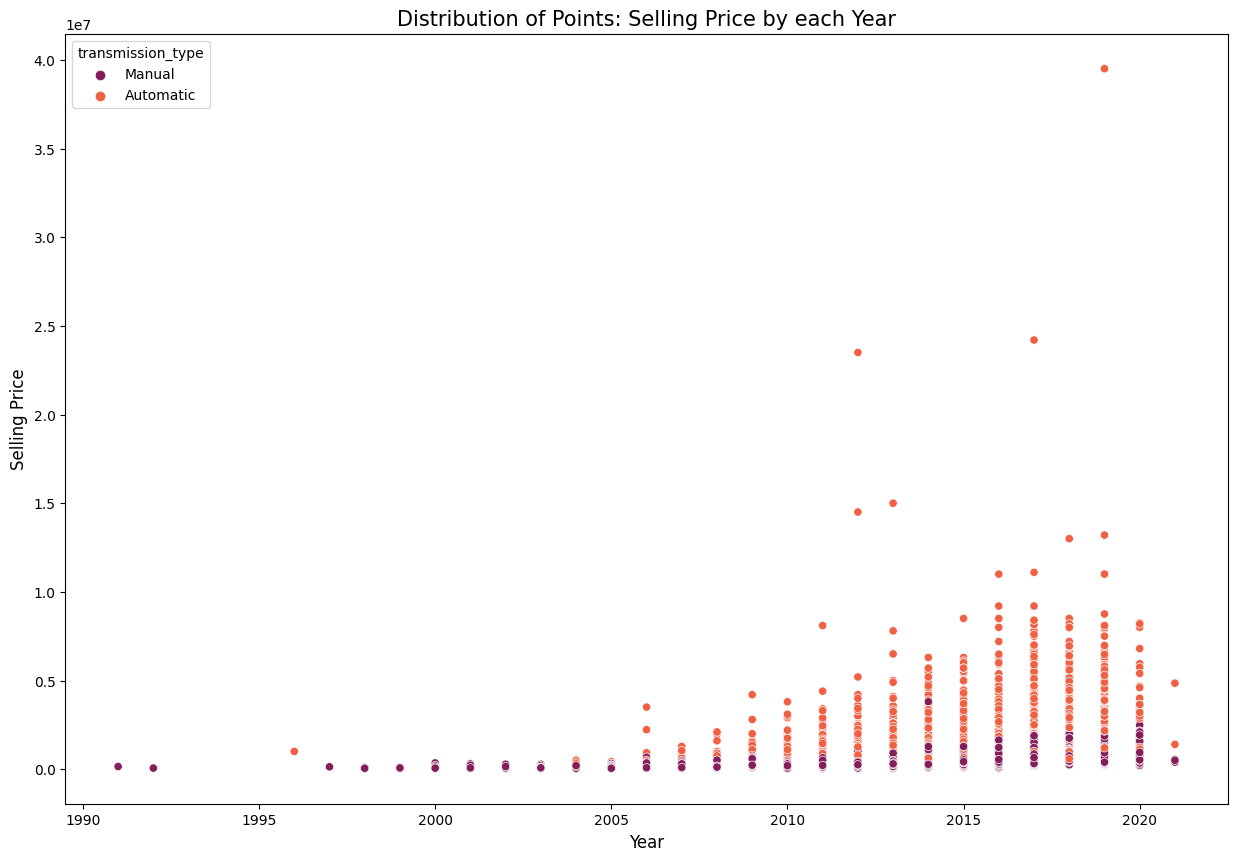

In [16]:
fig, scatter = plt.subplots(figsize = (15,10))
scatter = sns.scatterplot(data=cars, x="year", y="selling_price", hue="transmission_type", palette="rocket")
plt.title("Distribution of Points: Selling Price by each Year", size=15)
plt.xlabel("Year", size=12)
plt.ylabel("Selling Price", size=12)
plt.show()

From the scatter plot we can conclude that the price of cars increases by each year and the Automatic cars tends to be more expensive than the manual ones.

### Km Driven and Selling Price

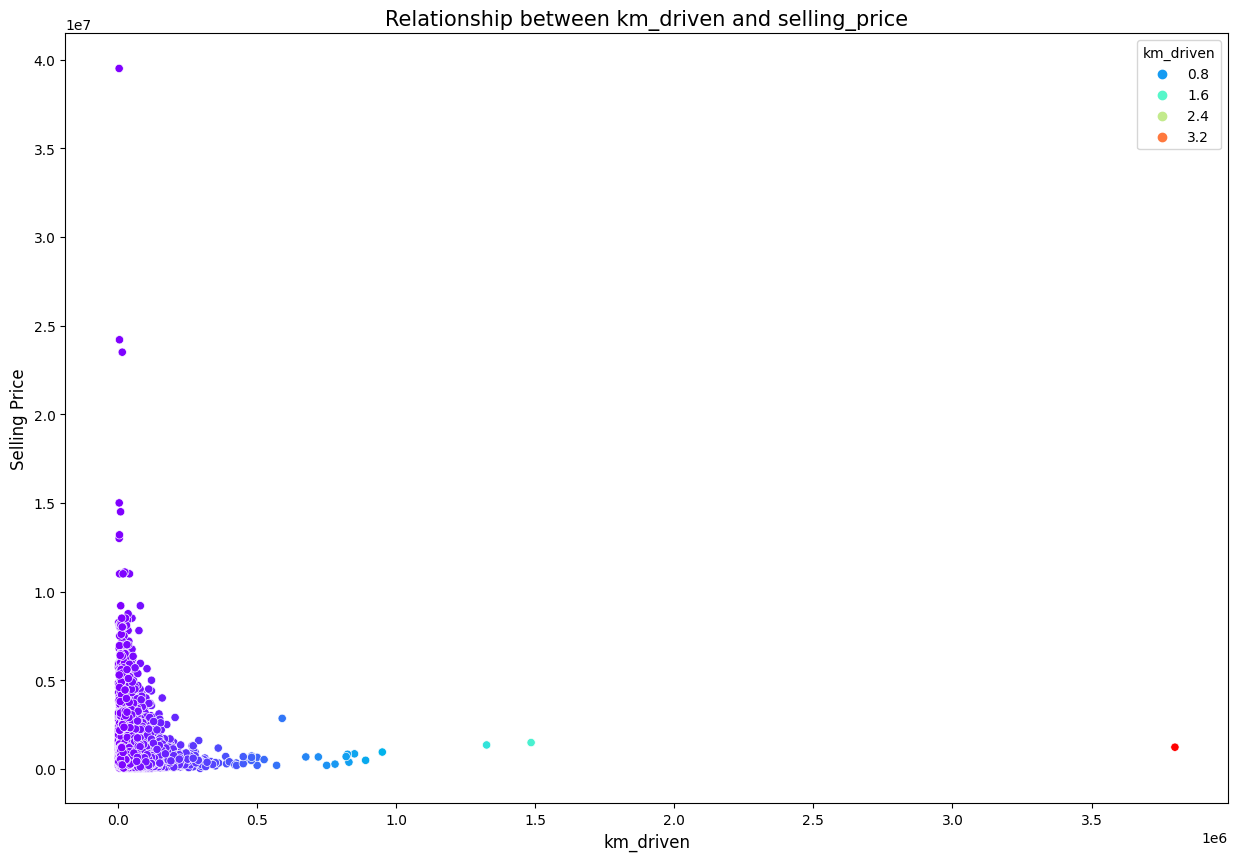

In [17]:
fig, scatterplot = plt.subplots(figsize = (15,10))
scatterplot= sns.scatterplot(data=cars, x="km_driven", y="selling_price", hue="km_driven", palette="rainbow")
plt.title("Relationship between km_driven and selling_price", size=15)
plt.xlabel("km_driven", size=12)
plt.ylabel("Selling Price", size=12)
plt.show()

As we can see, the selling_price tends to go down as the km_driven increases.

### Engine and Max power

Correlation between Engine and Selling Price is: 0.5872781887650516
Correlation between Max Power and Selling Price is: 0.7507992365525257


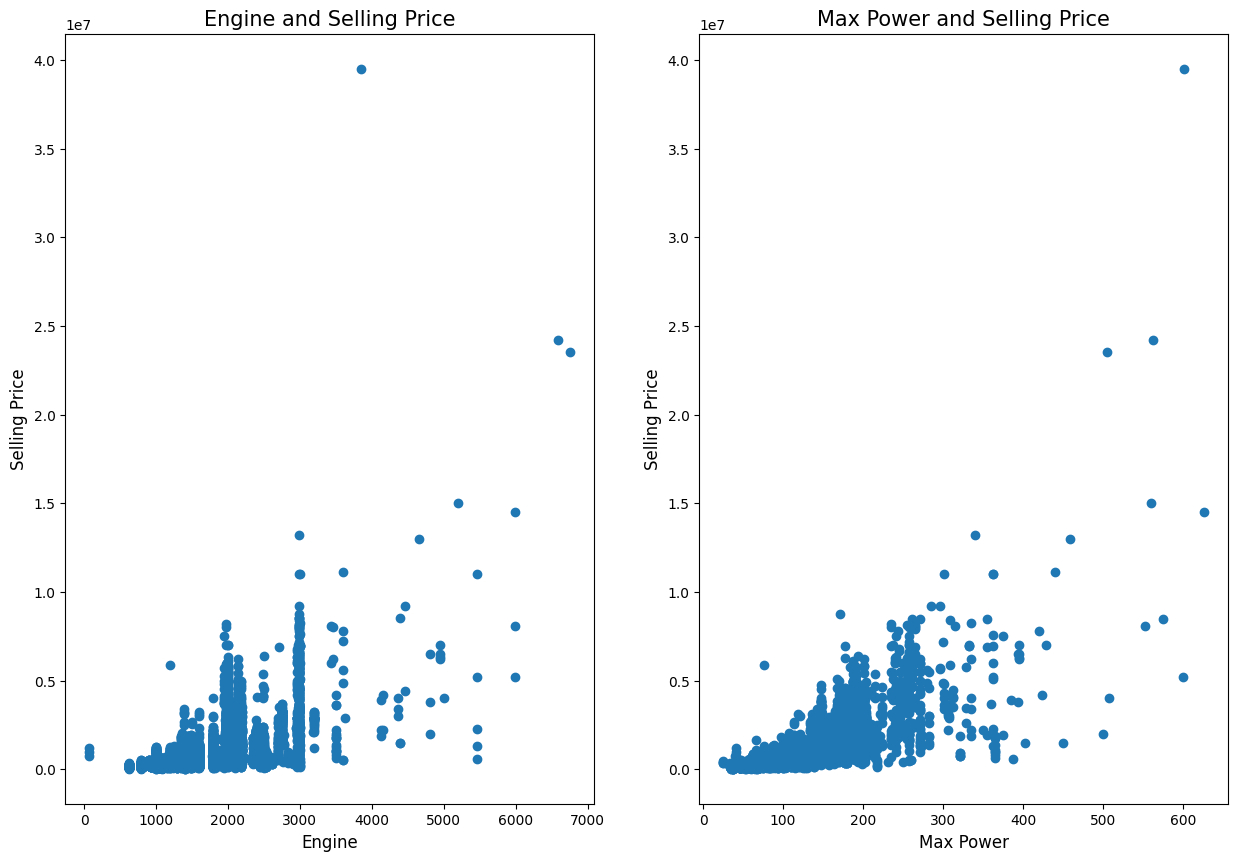

In [18]:
a=cars['engine']
b=cars['selling_price']
fig, scatterplot = plt.subplots(figsize =(15,10))
plt.subplot(1,2,1)
scatter = plt.scatter(a, b)
data1=cars.corr()["engine"]["selling_price"]
print("Correlation between Engine and Selling Price is:", data1)
plt.title("Engine and Selling Price",size=15)
plt.xlabel("Engine", size=12)
plt.ylabel("Selling Price", size=12)

x=cars['max_power']
y=cars['selling_price']
plt.subplot(1,2,2)
scatter = plt.scatter(x, y)
data2=cars.corr()["max_power"]["selling_price"]
print("Correlation between Max Power and Selling Price is:", data2)
plt.title("Max Power and Selling Price", size=15)
plt.xlabel("Max Power", size=12)
plt.ylabel("Selling Price", size=12)
plt.show()

As it can be observed, both features engine and max_power have a moderate-high correlation with the selling price.

### Selling price as per Seats in Car

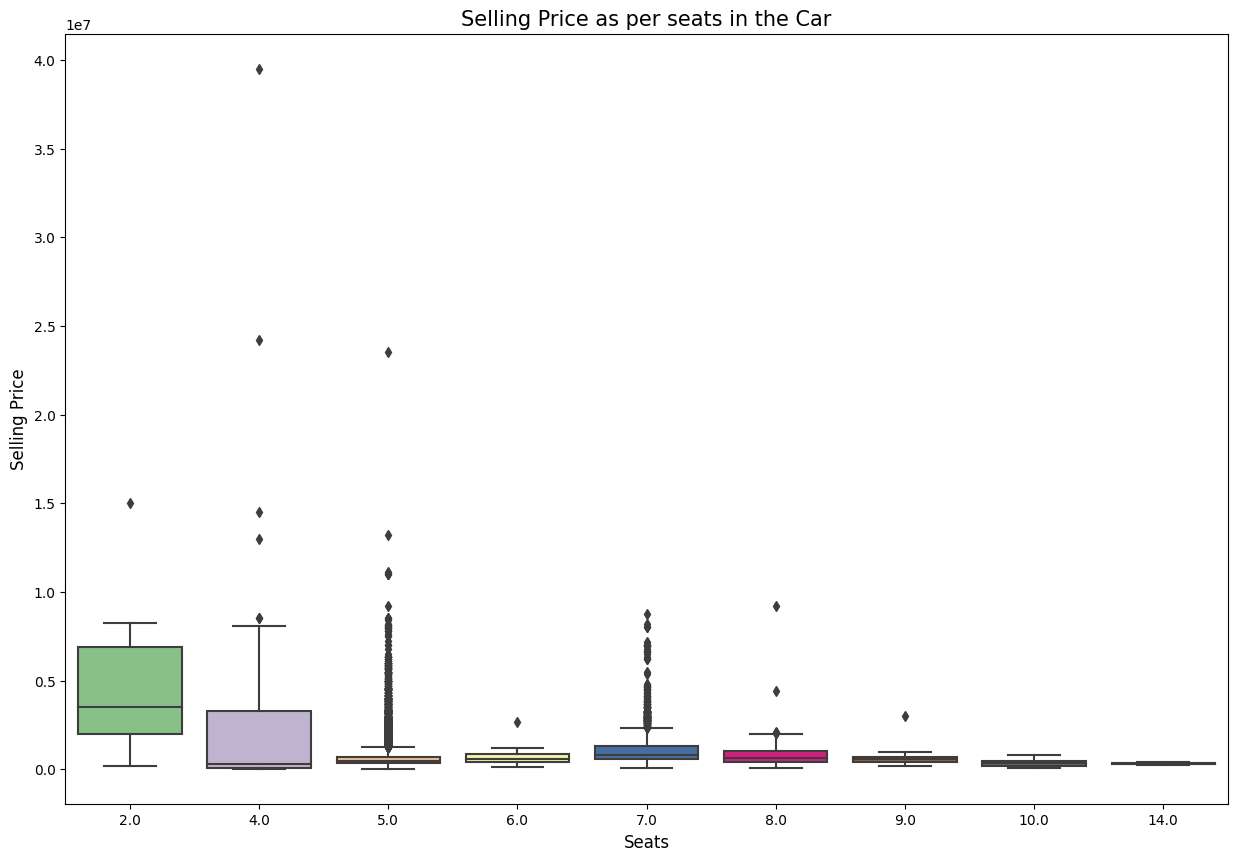

In [19]:
fig, boxplot = plt.subplots(figsize = (15,10))
boxplot = sns.boxplot(data=cars, x='seats', y='selling_price', palette="Accent")
plt.title("Selling Price as per seats in the Car", size=15)
plt.xlabel("Seats", size=12)
plt.ylabel("Selling Price", size=12)
plt.show()

It can be observed that selling price values of cars with 2, 4, 5 and 7 seats have a big deviation, while others have price < 2,500,000 in most cases.

### Selling Price as per Fuel Type in the Car

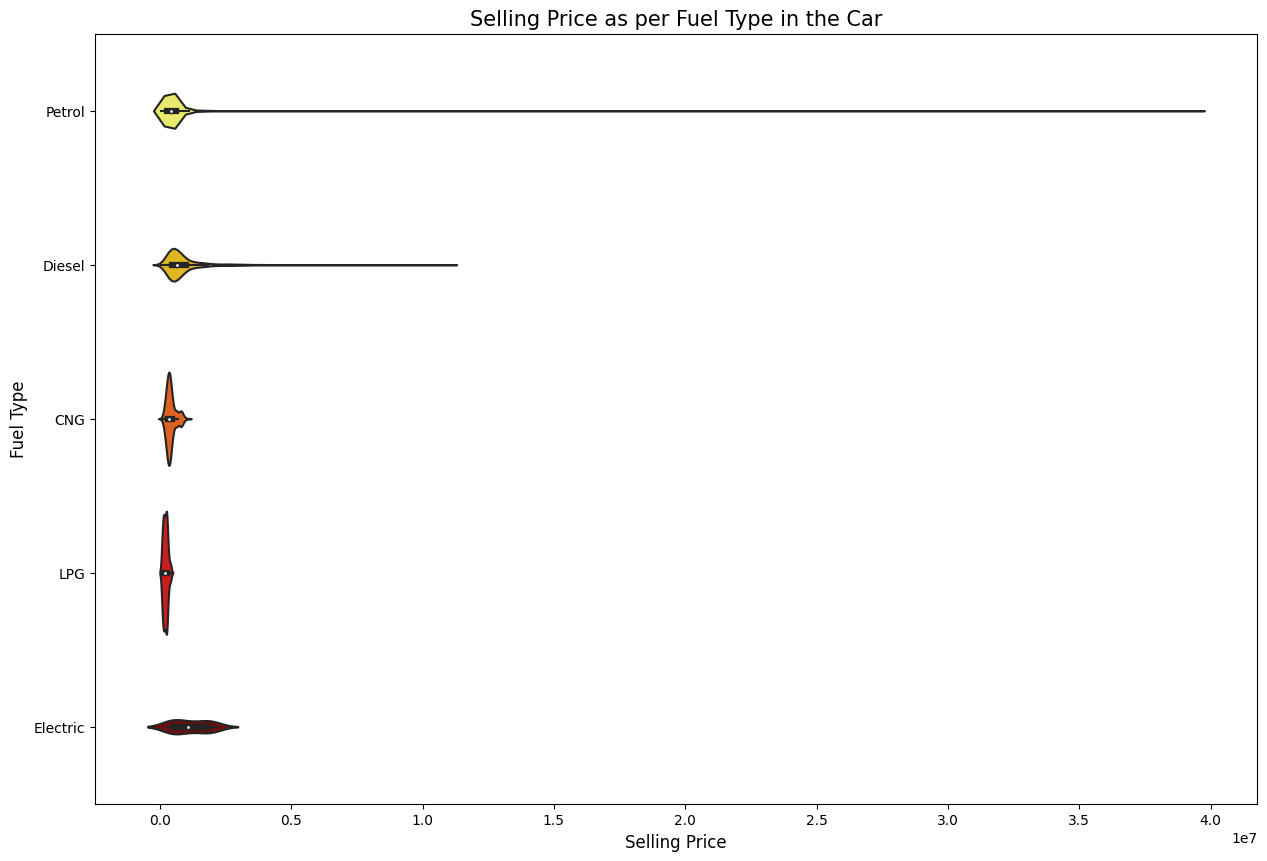

In [20]:
fig, violinplot = plt.subplots(figsize = (15,10))
violinplot = sns.violinplot(data=cars,x='selling_price', y='fuel_type',orient='h',palette="hot_r")
plt.title("Selling Price as per Fuel Type in the Car", size=15)
plt.xlabel("Selling Price", size=12)
plt.ylabel("Fuel Type", size=12)
plt.show()

The graph above reveals that selling prices of cars with petrol and diesel fuel also have a big deviation, while others have price < 2,000,000.

### Top 10 Company in the Dataset

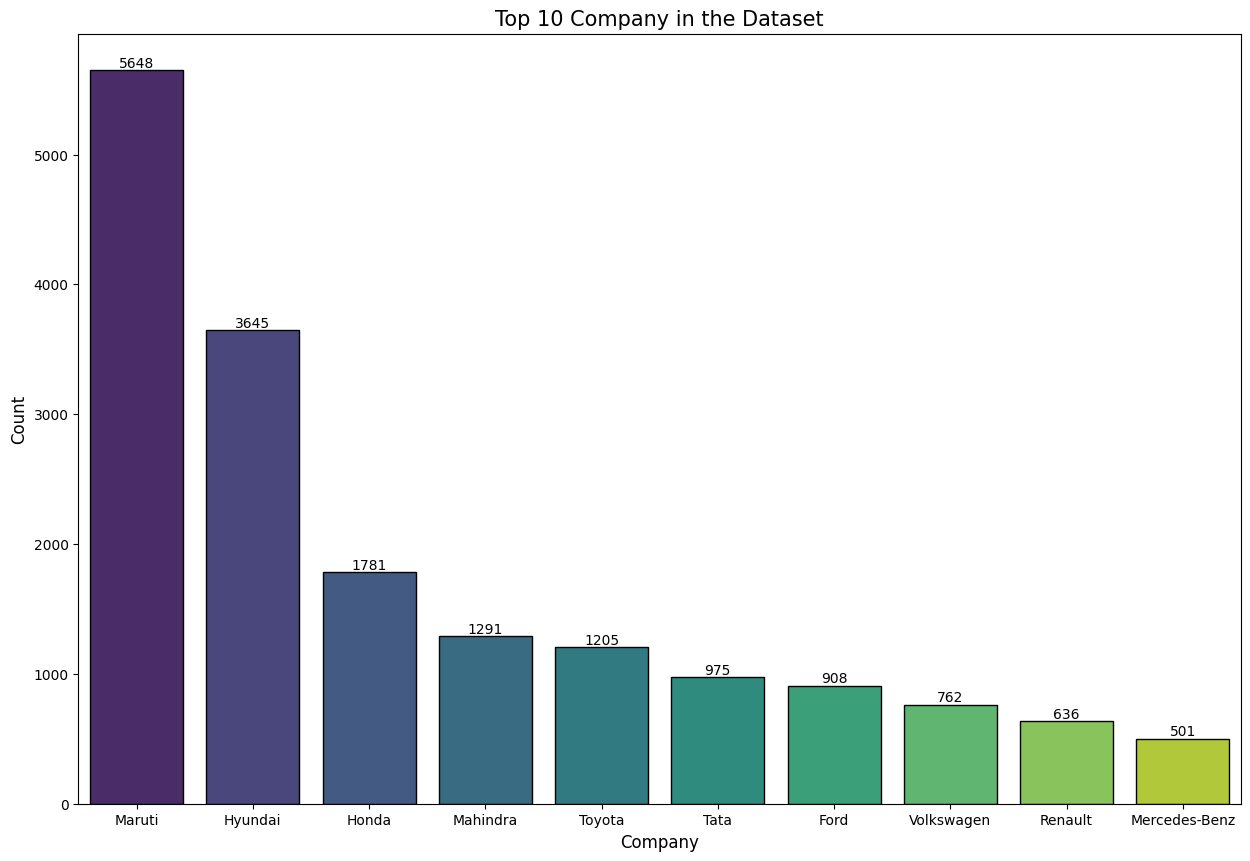

In [21]:
new=cars.Company.value_counts().head(10)
fig, barplot = plt.subplots(figsize = (15,10))
barplot= sns.barplot(data=cars, x=new.index, y=new.values, palette="viridis", ec="black")
barplot.bar_label(barplot.containers[0])
plt.title("Top 10 Company in the Dataset", size=15)
plt.xlabel("Company", size=12)
plt.ylabel("Count", size=12)
plt.show()

### Least 15 Company in the Dataset

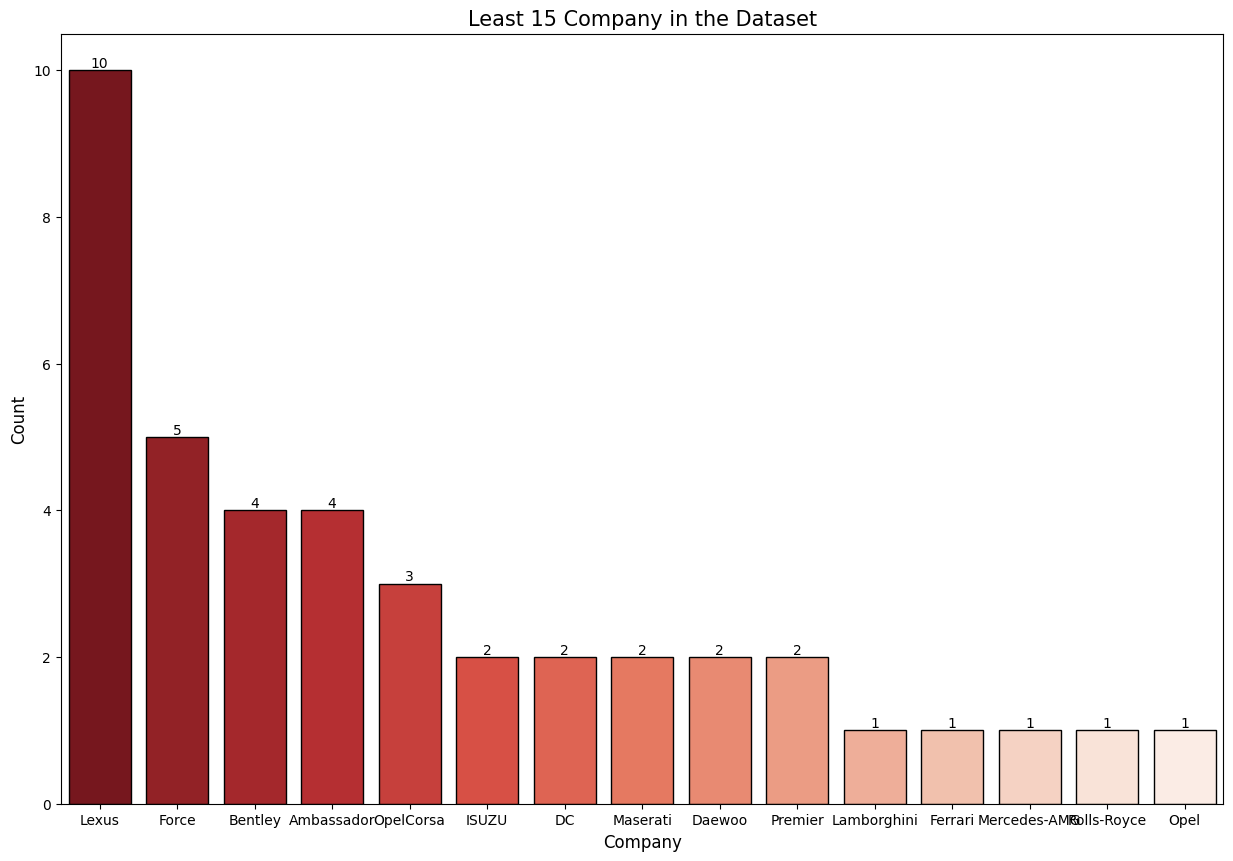

In [22]:
new=cars.Company.value_counts().tail(15)
fig, barplot = plt.subplots(figsize = (15,10))
barplot= sns.barplot(data=cars, x=new.index, y=new.values, palette="Reds_r", ec="black")
barplot.bar_label(barplot.containers[0])
plt.title("Least 15 Company in the Dataset", size=15)
plt.xlabel("Company", size=12)
plt.ylabel("Count", size=12)
plt.show()

### Top 10 years with Highest Sales

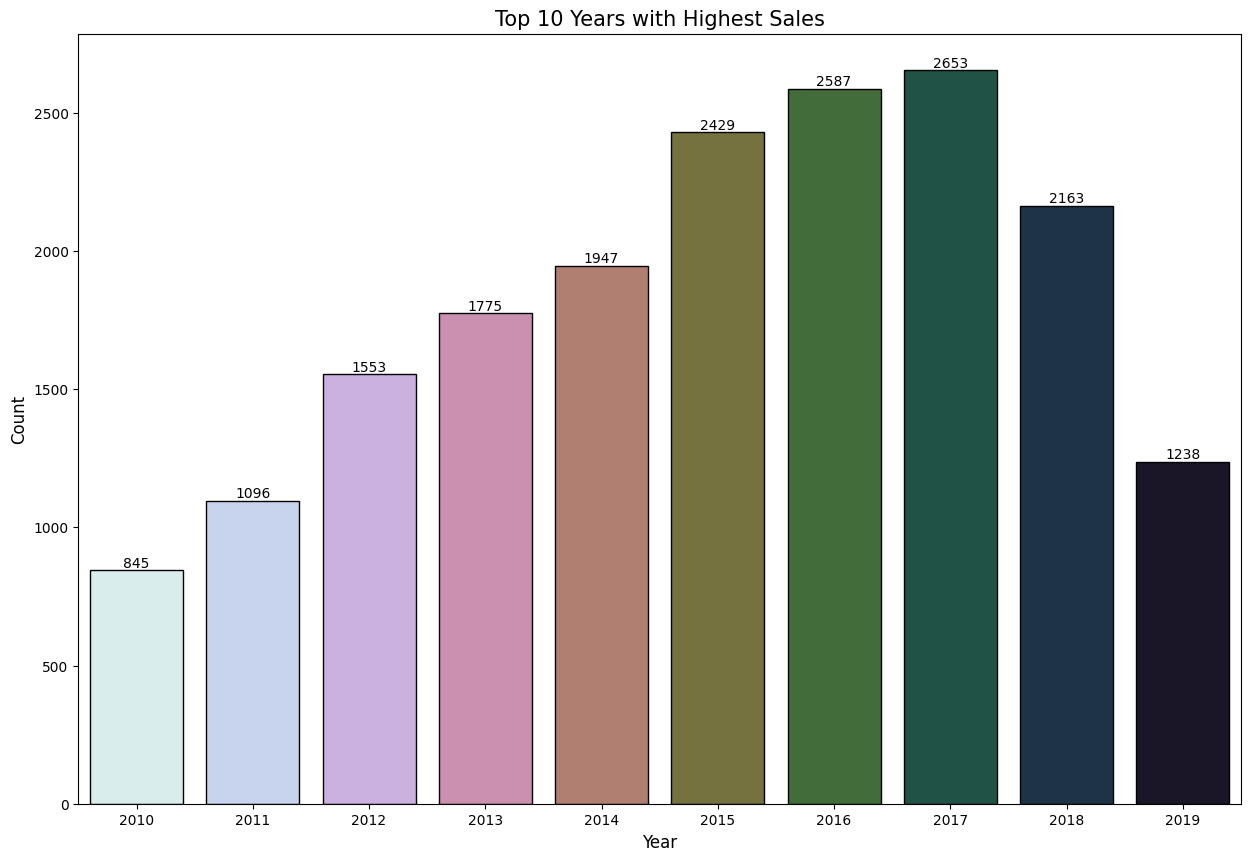

In [23]:
new=cars.year.value_counts().head(10)
fig, barplot = plt.subplots(figsize = (15,10))
barplot= sns.barplot(data=cars, x=new.index, y=new.values, palette="cubehelix_r", ec="black")
barplot.bar_label(barplot.containers[0])
plt.title("Top 10 Years with Highest Sales", size=15)
plt.xlabel("Year", size=12)
plt.ylabel("Count", size=12)
plt.show()

From the graph we can conclude that the sales was highest in the year 2017.

### Top 10 Car company with Highest selling price

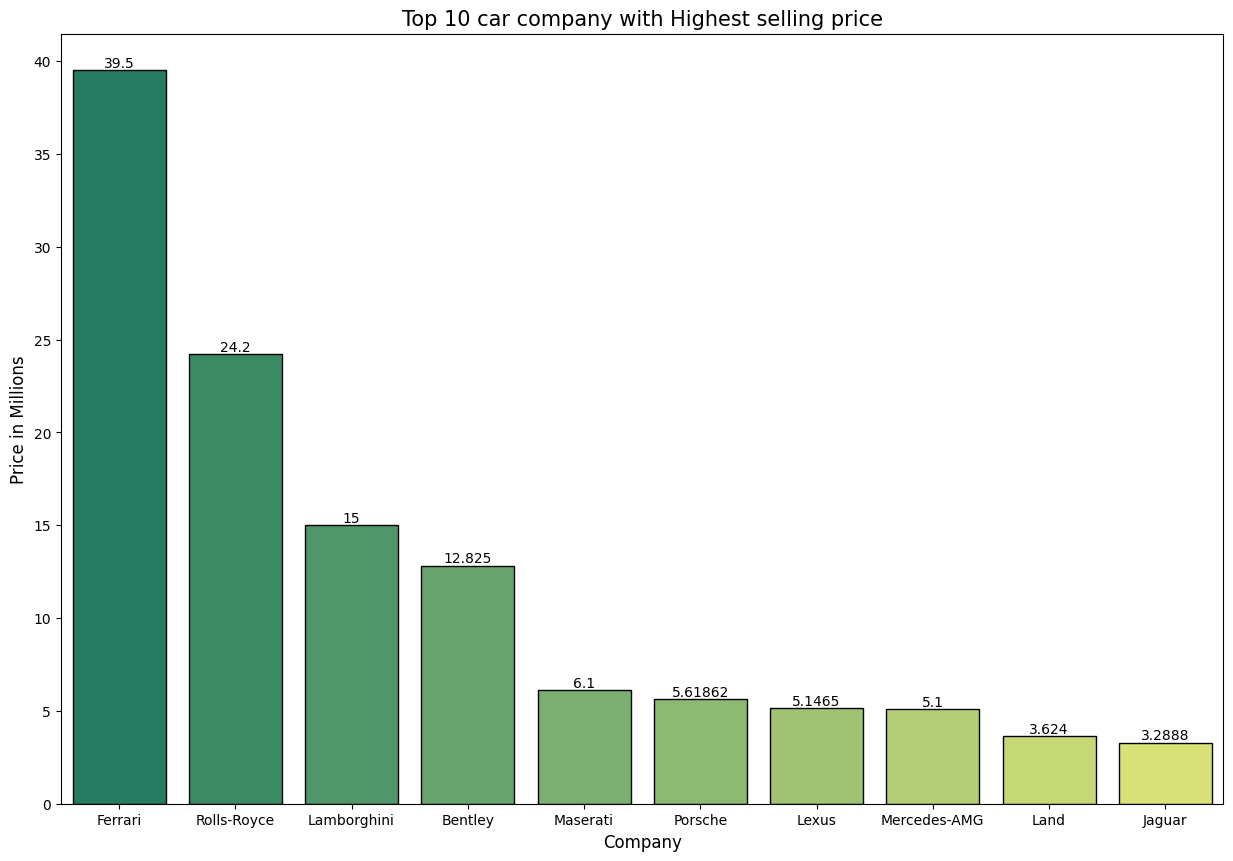

In [24]:
data = cars.groupby('Company')['selling_price'].mean().sort_values(ascending=False).head(10)/1000000
fig, barplot = plt.subplots(figsize = (15,10))
barplot= sns.barplot(data=cars, x=data.index, y=data.values, palette="summer", ec="black")
barplot.bar_label(barplot.containers[0])
plt.title("Top 10 car company with Highest selling price", size=15)
plt.xlabel("Company", size=12)
plt.ylabel("Price in Millions", size=12)
plt.show()

### Conclusion
From Exploratory Data Analysis, we can conclude the following findings from the result:
- The car price increases by each year and the Automatic cars tends to be more expensive than the manual ones.
- The car price decreases as the km_driven increases.
- It is observed that there is a moderate correlation between engine and selling price.
- It is observed that there is a high correlation between max_power and selling price.
- It is observed that selling price values of cars with 2, 4, 5 and 7 seats have a big deviation, while others have price < 2,500,000 in most cases.
- Selling prices of cars with petrol and diesel fuel also have a big deviation, while others have price < 2,000,000.
- Found the top 10 Company of cars from the dataset.
- Found the least 15 Company of cars from the dataset.
- Within the top 10 years, 2017 was having the highest sales.
- Ferrari is having the highest selling price, from the top 10 Company with highest selling price.

<font color=blue> <h1> Feature Engineering </h1> </font>

### Inputing Missing Values

In [25]:
null_count()

,Data Type,Null Count,Percentage of Null
selling_price,int32,0,0.000000
year,int64,0,0.000000
seller_type,object,0,0.000000
km_driven,int32,0,0.000000
fuel_type,object,0,0.000000
transmission_type,object,0,0.000000
mileage,float64,160,0.801041
engine,float64,110,0.550716
max_power,float64,337,1.687193
seats,float64,87,0.435566


In [26]:
for i in ['mileage', 'engine', 'max_power', 'seats']:
    company_name = cars[cars[i].isnull()]['Company'].value_counts().index[0]
    if cars[i].nunique()>10:
        values = cars[cars['Company']==company_name][i].mean()
    else:
        values = cars[cars['Company']==company_name][i].median()
        
    cars[i].fillna(values, inplace=True)
    
null_count()

,Data Type,Null Count,Percentage of Null
selling_price,int32,0,0.000000
year,int64,0,0.000000
seller_type,object,0,0.000000
km_driven,int32,0,0.000000
fuel_type,object,0,0.000000
transmission_type,object,0,0.000000
mileage,float64,0,0.000000
engine,float64,0,0.000000
max_power,float64,0,0.000000
seats,float64,0,0.000000


### Removing the outliers in the data

In [27]:
cars = cars[cars['selling_price'] < 20000000]
cars = cars[cars['km_driven'] < 1000000]
cars = cars[cars['mileage'] < 100]
cars = cars[cars['engine'] < 6100]
cars = cars[cars['max_power'] < 530]
cars = cars.reset_index(drop=True)

### Applying Discretization on Company

In [28]:
company_name = cars.Company.value_counts().index[:15]
for i in range(cars.shape[0]):
    if cars['Company'][i] in company_name:
         continue
    else:
        cars['Company'][i] = 'others'

### Encoding Categorical features

In [29]:
cars.replace({'fuel_type': {'Petrol': 0, 'Diesel':1, 'CNG': 2, 'LPG': 3, 'Electric': 4}}, inplace=True)

cars.replace({'seller_type': {'Dealer': 0, 'Individual':1}}, inplace=True)

cars.replace({'transmission_type': {'Manual': 0, 'Automatic':1}}, inplace=True)


In [30]:
cars.head(5)

,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,Company
0,120000,2012,1,120000,0,0,19.70,796.0,46.30,5.0,Maruti
1,550000,2016,1,20000,0,0,18.90,1197.0,82.00,5.0,Hyundai
2,215000,2010,1,60000,0,0,17.00,1197.0,80.00,5.0,Hyundai
3,225999,2012,1,37000,0,0,20.92,998.0,67.10,5.0,Maruti
4,570000,2015,0,30000,1,0,22.77,1498.0,98.59,5.0,Ford


<font color=blue> <h1> Model Building </h1> </font>

### Segregating the Data and Target

In [31]:
x = cars.drop(['Company', 'selling_price', 'seller_type'], axis=1)
y = cars['selling_price']
x

,year,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
0,2012,120000,0,0,19.70,796.0,46.30,5.0
1,2016,20000,0,0,18.90,1197.0,82.00,5.0
2,2010,60000,0,0,17.00,1197.0,80.00,5.0
3,2012,37000,0,0,20.92,998.0,67.10,5.0
4,2015,30000,1,0,22.77,1498.0,98.59,5.0
...,...,...,...,...,...,...,...,...
19954,2009,15000,0,0,19.00,998.0,66.10,5.0
19955,2017,69480,1,0,23.59,1364.0,67.05,5.0
19956,2019,18000,0,0,17.50,1373.0,91.10,7.0
19957,2015,67000,1,0,21.14,1498.0,103.52,5.0


### Separating the Data and the Target

In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.30,random_state=25)
print(xtrain.shape)
print(xtest.shape)

(13971, 8)
(5988, 8)


### Feature Scaling

In [33]:
"""scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)"""

'scaler = StandardScaler()\nxtrain = scaler.fit_transform(xtrain)\nxtest = scaler.transform(xtest)'

## 1.Linear Regression Model

### Training and Fitting the model.

In [34]:
lr=LinearRegression()
model_1=lr.fit(xtrain, ytrain)
model_1

LinearRegression()

### Making predictions

In [35]:
prediction=model_1.predict(xtest)
prediction

array([476716.56897494,  74199.51487316, 251472.36417724, ...,
         6665.63323559, 981575.28578874, 801536.51188298])

### Checking the accuracy of the model

In [36]:
print("Model Score:", model_1.score(xtest, ytest))

Model Score: 0.647839314175823


The model_1 is 68% accurate

## 2. Decision Tree Regressor

In [37]:
dr=DecisionTreeRegressor()
model_2=dr.fit(xtrain, ytrain)
model_2

DecisionTreeRegressor()

### Making Predictions

In [38]:
prediction=model_2.predict(xtest)
prediction

array([ 390000.,  299000.,  499000., ...,  185000., 1275000.,  750000.])

### Checking the accuracy of the model

In [39]:
print("Model Score:", model_2.score(xtest, ytest))

Model Score: 0.8494311218450546


The model_1 is 85% accurate

## 3. Random Forest Regressor

In [50]:
rfr=RandomForestRegressor()
model_3=rfr.fit(xtrain.values, ytrain)
model_3

RandomForestRegressor()

### Making Predictions

In [51]:
prediction=model_3.predict(xtest)
prediction

array([ 419379.93      ,  275726.66666667,  465490.        , ...,
        221214.9425    , 1165723.49      ,  738883.33333333])

### Checking the accuracy of the model

In [52]:
print("Model Score:", model_3.score(xtest, ytest))

Model Score: 0.8991386651717912


The model_3 is 89% accurate

# Conclusion 
From the results of Model scores we can conclude that among the three Models i.e. Linear Regression, Decision Tree Regressor and Random Forest Regressor; the Random Forest Regressor has the highest accuracy score and it will be best suited for the predictions.

The output shows that the model performed almost equally well on unseen data, which is a good sign. As the last step, we will save the model in the rfr_model.sav file and the cleaned train dataset in the clean_train.csv file, so we can use them later.

In [53]:
pred=model_3.predict([[2020, 3000, 1, 0, 30, 1000, 40,2]])
print(pred)

[583634.98]


In [54]:
data_=pickle.dump(rfr, open('rfr_model.sav', 'wb'))
cars.to_csv('clean_train.csv', index=False)

data2=pickle.dump(rfr, open('saved_rfr.pkl', 'wb'))

In [55]:
with open("saved_rfr.pkl", "rb") as file:
    data2=pickle.load(file)